<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Temperature-Prediction/blob/main/TemperaturePredictionEnsemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

     |████████████████████████████████| 378kB 1.4MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
     |████████████████████████████████| 87.9MB 61kB/s 
     |████████████████████████████████| 3.1MB 48.7MB/s 
     |████████████████████████████████| 501kB 47.3MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
path = "/content/drive/My Drive/Bias_correction_ucl.csv"
data = pd.read_csv(path)
data.head()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233948,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.8960,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.3125,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204092,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.5557,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.9648,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.5522,31.2,22.5


In [ ]:
data.fillna(0, inplace=True)
data.shape

(7752, 25)

In [ ]:
data.describe()

,Station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996646,735805.605134,29.499407,23.015338,56.210230,87.519785,29.326939,23.285106,7.029203,61.900288,0.365206,0.352635,0.315323,0.296297,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502804,30.169440,22.852348
std,7.213660,581.945869,4.083116,3.256071,15.618676,11.227876,4.123757,3.277967,2.281613,34.120103,0.263668,0.259164,0.251090,0.254803,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158868,3.596114,2.827042
min,0.000000,719163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520500,0.000000,0.000000
25%,7.000000,735429.000000,27.700000,21.600000,45.735368,84.038809,27.601014,22.032373,5.647741,36.776474,0.141643,0.136090,0.097389,0.077967,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018600,28.200000,21.300000
50%,13.000000,735809.000000,29.900000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,0.309148,0.258831,0.224420,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345200,30.500000,23.100000
75%,19.000000,736191.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134001,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316400,32.600000,24.600000
max,25.000000,736571.000000,37.600000,29.900000,98.524735,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974709,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.896000,38.900000,29.800000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7dcc2ff28>,
      dtype=object)

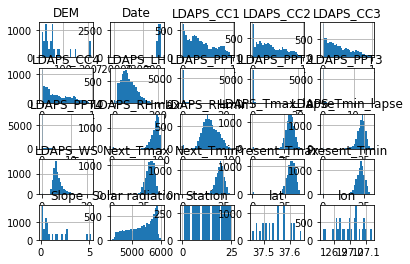

In [ ]:
data.hist(bins=30)

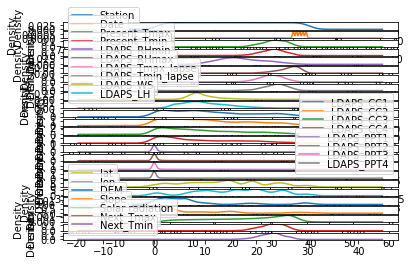

In [ ]:
data.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=10)
plt.show()

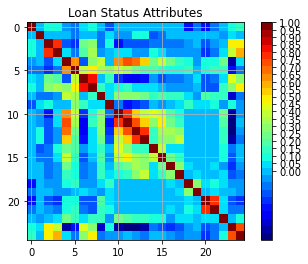

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Loan Status Attributes')

fig.colorbar(cax, ticks=[0.00,0.05,0.1,0.15,0.20,0.25,0.3,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,.80,.85,.90,.95,1])
plt.show()

In [ ]:
Y = data[['Next_Tmax', 'Next_Tmin']]
X = data.drop(['Next_Tmax', 'Next_Tmin'], axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (7752, 23) Y.shape: (7752, 2)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [ ]:
print("X_train.shape:", X_train.shape, "X_test.shape:", X_test.shape, "Y_train.shape:", Y_train.shape, "Y_test.shape:", Y_test.shape)

X_train.shape: (6201, 23) X_test.shape: (1551, 23) Y_train.shape: (6201, 2) Y_test.shape: (1551, 2)


In [ ]:
MODEL = []

In [ ]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('RF', RandomForestClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))
print(models_list)

[('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')), ('RF', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('SVM

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, random_state=123)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous-multioutput'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous-multioutput'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this

CART: nan (nan) (run time: 0.050508)
RF: nan (nan) (run time: 0.045688)
SVM: nan (nan) (run time: 0.044794)
NB: nan (nan) (run time: 0.049680)
KNN: nan (nan) (run time: 0.057317)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous-multioutput'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous-multioutput'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous-multioutput'

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The 

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
                                                                        RandomForestClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=0.1, kernel='linear')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
print(confusion_matrix(Y_test, predictions))

In [ ]:
model.fit(X_test, Y_test)
print("Accuracy score %f" % accuracy_score(Y_test, model.predict(X_test)))

MODEL.append(model)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
k=3
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)
print("Train Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train), normalize=True))
print("Test Accuracy: ", metrics.accuracy_score(Y_test, Y_pred, normalize=True))

In [ ]:
k=10
MeanAccuracy = np.zeros(k-1)
StandardAccuracy = np.zeros(k-1)

for i in range(1,k):
    neigh = KNeighborsClassifier(n_neighbors=i).fit(X_train, Y_train)
    Y_pred = neigh.predict(X_test)
    MeanAccuracy[i-1] = metrics.accuracy_score(Y_test, Y_pred)
    StandardAccuracy[i-1] = np.std(Y_pred==Y_test)/np.sqrt(Y_pred.shape[0])

MeanAccuracy

In [ ]:
print("Best MEAN Accuracy of ", MeanAccuracy.max()," obtained at k=", MeanAccuracy.argmax()+1)
print("Best STANDARD Accuracy of ", StandardAccuracy.max()," obtained at k=", StandardAccuracy.argmax()+1)

In [ ]:
plt.plot(range(1,k), MeanAccuracy,'g')
plt.fill_between(range(1,k), MeanAccuracy - 1 * StandardAccuracy, MeanAccuracy + 1 * StandardAccuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neigbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=MeanAccuracy.argmax()+1).fit(X_test, Y_test)
print("Accuracy Score :: %f" % accuracy_score(Y_test, neigh.predict(X_test)))

MODEL.append(neigh)

#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
max_depth=10
MeanAccuracy = np.zeros(max_depth-1)
StandardAccuracy = np.zeros(max_depth-1)

for i in range(1, max_depth):
  drugTree = DecisionTreeClassifier(criterion="gini", max_depth = i, splitter='best')
  drugTree.fit(X_train, Y_train)
  predTree = drugTree.predict(X_test)
  MeanAccuracy[i-1] = metrics.accuracy_score(Y_test, predTree)
  StandardAccuracy[i-1] = np.std(predTree==Y_test)/np.sqrt(predTree.shape[0])
  print("DecisionTree's Accuracy: ", metrics.accuracy_score(Y_test, predTree))

In [ ]:
print("Best MEAN Accuracy of ", MeanAccuracy.max()," obtained at i=", MeanAccuracy.argmax()+1)
print("Best STANDARD Accuracy of ", StandardAccuracy.max()," obtained at i=", StandardAccuracy.argmax()+1)

In [ ]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth = MeanAccuracy.argmax()+1, splitter='best')
drugTree.fit(X_train, Y_train)
print("Accuracy Score :: %f" % accuracy_score(Y_test, drugTree.predict(X_test)))

MODEL.append(drugTree)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

#LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
LR

In [ ]:
Y_pred = LR.predict(X_test)
Y_pred_prob = LR.predict_proba(X_test)

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn import metrics

print("Jaccard Similarity: ", jaccard_similarity_score(Y_test, Y_pred))
print("Mean Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
LR.fit(X_train, Y_train)
print("Accuracy Score :: %f" % accuracy_score(Y_test, LR.predict(X_test)))

MODEL.append(drugTree)

In [ ]:
MODEL

In [ ]:
for i in MODEL:
  print("ACCURACY::", accuracy_score(Y_test, i.predict(X_test)))

#FEATURE SELECTION

In [ ]:
#TAKE A PAUSE 

In [ ]:
Y = data[''].values
X = data.drop(['',''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

In [ ]:
import statsmodels.api as sm
X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())

In [ ]:
data.drop(['',''], axis = 1)

In [ ]:
X = data.drop([''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)

X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())

In [ ]:
data.drop([''], axis = 1)

In [ ]:
X = data.drop([''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)

X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())

In [ ]:
data.drop([''], axis = 1)

In [ ]:
X = data.drop([''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)

X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())

In [ ]:
data.drop([''], axis = 1)

In [ ]:
X = data.drop([''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)

X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())

In [ ]:
data.drop([''], axis = 1)

In [ ]:
X = data.drop([''], axis=1).values
X = preprocessing.StandardScaler().fit(X).transform(X)

X_Opt = np.append(arr = np.ones((data.shape[0], 1)), values = X, axis = 1)
regressor_OLS = sm.OLS(Y, X_Opt).fit()
print(regressor_OLS.summary())